In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
takehome = pd.read_csv(r'C:\\Users\\mendo\\Springboard\\Take Home Challenges\\relax_challenge\\takehome_users.csv', encoding='cp1252')
takehome.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
engagement = pd.read_csv(r'C:\\Users\\mendo\\Springboard\\Take Home Challenges\\relax_challenge\\takehome_user_engagement.csv')

First, I create a data set ranging from the earliest date in the data to the the latest. I then give each date a value: the first date in the data set has a value of 1, the 100th has a value of 100.

In [4]:
engagement['date'] = pd.to_datetime(engagement['time_stamp'].str[0:10])

base = engagement['date'].min()
numdays = (engagement['date'].max() - engagement['date'].min()).days
datelist = pd.date_range(base, periods=numdays).tolist()

datelist = pd.DataFrame(datelist)
datelist['count'] = 1
datelist['count'] = datelist['count'].cumsum()
datelist.columns = ['date', 'day_number']

In [5]:
engagement = engagement.merge(datelist, how='inner', on='date').sort_values(['user_id', 'date']).reset_index(drop=True)

Next, I make note of when a user's first day is. I use this to inform a starting date of 0 to begin counting. If a user logged in on 2-3-14 and then on 2-8-14, they have two logins five days apart.

I do a rolling sum of the last three login dates. If that number is less than 7, meaning a user logged in three times in 7 days or less, they are labelled as an adopter.

In [6]:
engagement['date_diff'] = engagement['day_number'] - engagement['day_number'].shift(1)
engagement['first_day'] = engagement.groupby('user_id')['visited'].cumsum().reset_index(0,drop=True)

dd = []
for index, row in engagement.iterrows():
    if row['first_day'] == 1:
        dd.append(0)
    else:
        dd.append(row['date_diff'])
engagement['date_diff'] = dd

engagement['date_diff_space'] = engagement.groupby('user_id')['date_diff'].rolling(3).sum().reset_index(0,drop=True)

In [7]:
engagement.head(40)

,time_stamp,user_id,visited,date,day_number,date_diff,first_day,date_diff_space
0,2014-04-22 03:53:30,1,1,2014-04-22,692,0.0,1,NaN
1,2013-11-15 03:45:04,2,1,2013-11-15,534,0.0,1,NaN
2,2013-11-29 03:45:04,2,1,2013-11-29,548,14.0,2,NaN
3,2013-12-09 03:45:04,2,1,2013-12-09,558,10.0,3,24.0
4,2013-12-25 03:45:04,2,1,2013-12-25,574,16.0,4,40.0
5,2013-12-31 03:45:04,2,1,2013-12-31,580,6.0,5,32.0
6,2014-01-08 03:45:04,2,1,2014-01-08,588,8.0,6,30.0
7,2014-02-03 03:45:04,2,1,2014-02-03,614,26.0,7,40.0
8,2014-02-08 03:45:04,2,1,2014-02-08,619,5.0,8,39.0
9,2014-02-09 03:45:04,2,1,2014-02-09,620,1.0,9,32.0


In [8]:
engagement = engagement[['user_id', 'date_diff_space']][engagement['date_diff_space'] <= 7][engagement['date_diff_space'] > 0]
engagement = engagement.drop_duplicates('user_id')
engagement['adopter'] = 1

adopted = engagement[['user_id', 'adopter']]

C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [9]:
takehome = takehome.merge(adopted, how='left', left_on='object_id', right_on='user_id').fillna(0)

Now, I'll make calculations to identify which users were disciples and how many people they sent invites to.

In [10]:
# figure out if user invited somebody
inviters = list(takehome['invited_by_user_id'].sort_values())
inviters = pd.DataFrame(inviters)
inviters['invitees'] = 1
inviters.columns = ['user_id', 'invitees']

inviters = inviters[inviters['user_id'] != 0].groupby('user_id').sum().reset_index()
inviters['inviter'] = 1

In [11]:
takehome = takehome.merge(inviters, how='left', left_on='object_id', right_on='user_id').fillna(0)

takehome['count'] = 1

In [12]:
source = takehome[['creation_source', 'count', 'adopter', 'invitees', 'inviter']].groupby('creation_source').sum().reset_index()
source

,creation_source,count,adopter,invitees,inviter
0,GUEST_INVITE,2163,318.0,1305.0,517.0
1,ORG_INVITE,4254,483.0,2188.0,882.0
2,PERSONAL_PROJECTS,2111,144.0,1230.0,478.0
3,SIGNUP,2087,266.0,999.0,419.0
4,SIGNUP_GOOGLE_AUTH,1385,198.0,695.0,268.0


A quick breakdown of: adopters by invite type; the inviters and the invitees by the inviter's invite type

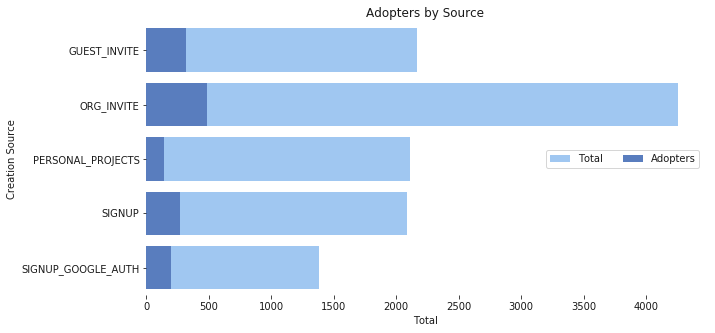

In [13]:
f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(x="count", y="creation_source", data=source,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="adopter", y="creation_source", data=source,
            label="Adopters", color="b")

ax.legend(ncol=3, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)
plt.ylabel('Creation Source')
plt.xlabel('Total')
plt.title('Adopters by Source')
plt.show()

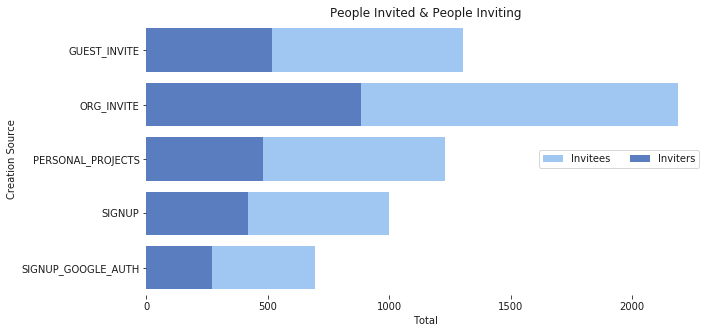

In [14]:
f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(x="invitees", y="creation_source", data=source,
            label="Invitees", color="b")

sns.set_color_codes("muted")
sns.barplot(x="inviter", y="creation_source", data=source,
            label="Inviters", color="b")

ax.legend(ncol=3, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)
plt.ylabel('Creation Source')
plt.xlabel('Total')
plt.title('People Invited & People Inviting')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm

In [16]:
for elem in takehome['creation_source'].unique():
    takehome[str(elem)] = takehome['creation_source'] == elem

A quick look at how these variables correlate to each other.

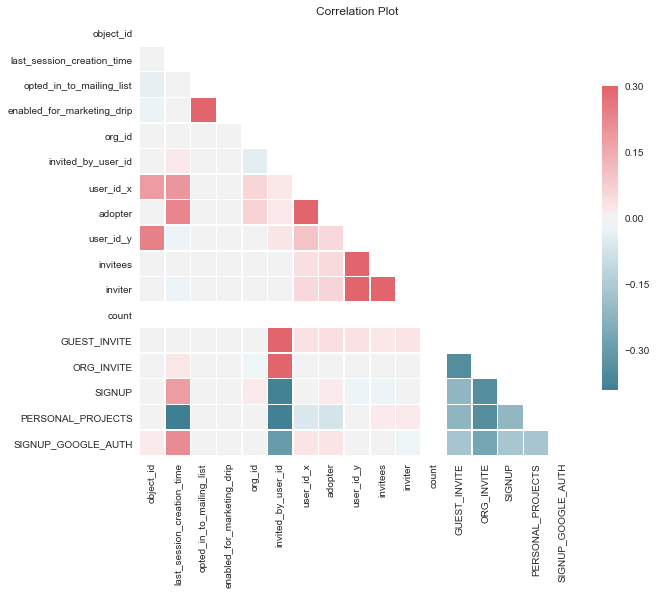

In [17]:
corr1 = takehome.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.title('Correlation Plot')
plt.show()

Based on the above, I included the variables with the most significant correlation (ignoring ID variables, which are impossible to logically connect back to our prediction based on their integer values).

In [18]:
Y = takehome['adopter']
X = takehome[['inviter', 'GUEST_INVITE', 'ORG_INVITE', 'PERSONAL_PROJECTS', 'last_session_creation_time']]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.5, random_state=42, stratify=Y)

d_tree = DecisionTreeClassifier()
d_tree.fit(xtrain, ytrain)

for n in range(2,10):
    scores = cross_val_score(d_tree, X, Y, cv=n)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.01)


In [19]:
predicted = d_tree.predict(xtest)
score = d_tree.score(xtest, ytest)
print(score)

metrics.confusion_matrix(ytest, predicted)

0.906166666667


array([[5033,  263],
       [ 300,  404]], dtype=int64)

I tried running a logistic regression and, while accurate, it could not identify adopters and instead labelled all as non-adopters. It was 88% accurate and completely useless.

As shown in the confusion matrix above, the decision tree had around 91% accuracy and correctly predicted a majority of adopters. 